# Perceptron

A node for decision making is called a Perceptron.

The factors affecting the decision can be weighted.

The decision can be made using a single threshold value for a binary valued output.

### Activation Function

### Nueral Networks 

Here, each node is a perceptron.

### Logic Gates

*Nand Gate*

Two inputs $x_1$ and $x_2$ with weights -2 and -2, the constant added is 3.

| $x_1$ | $x_2$ | $Output$ |
|------|------|------|
|   1  |   0  |  1   |
|   0  |   1  |  1   | 
|   0  |   0  |  -1  | 
|   1  |   1  |  3   | 

*And Gate*

Two inputs $x_1$ and $x_2$ with weights 2 and 2, the constant added is -3.

| $x_1$ | $x_2$ | $Output$ |
|------|------|------|
|   1  |   0  |  -1  |
|   0  |   1  |  -1  | 
|   0  |   0  |  -3  | 
|   1  |   1  |   1  | 

### Training A Perceptron

$$
w_i = w_i + \Delta w_i
$$

$$
\Delta w_i = \eta(t - o)x_i
$$

- $t$ is the target value
- $o$ is the perceptron output
- $\eta$ is the learning rate (Commonly $\alpha$)

**Algorithm**

Choose weight randomly and then calculate the output obtained.

Used the outputs to take difference and that difference is called error.

Based on the error the weights are updated.

The threshold is fixed across the epochs.

### Epoch

When you training a model and have gone through every data point, that is the end of one epoch.

One epoch is one iteration. But here one iteration is one forward pass plus one backward pass of updataing weights.

# Dataset

### Description

In this experiment, we will use the CIFAR-10 dataset. It consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

**The code returns the contents of each data file as a dictionary**.

There are 8 pickled (To know more about pickle refer **Python_Pickle_Introduction** notebook )files in the CIFAR-10 directory.

    1. batches.meta

    2. data_batch_1

    3. data_batch_2	

    4. data_batch_3

    5. data_batch_4	

    6. data_batch_5

    7. readme.html

    8. test_batch

Getting into details of this dataset:


**data** : A 50,000x3072 numpy array of unsigned integers. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** : A list of 50,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.



### DataSource

https://www.cs.toronto.edu/~kriz/cifar.html

### Perceptron


A perceptron has one or more inputs, a bias, an activation function, and a single output. The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output. 


### Setup Steps

In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp3/AIML_DS_CIFAR-10_STD.zip")
ipython.magic("sx unzip AIML_DS_CIFAR-10_STD.zip")


In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import itertools
import operator
import random
import collections
from scipy import stats
from sklearn.metrics import accuracy_score

#### Function to unpickle the data

In [0]:
import pickle
# Getting the data
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_1 = pickle.load(fo, encoding='Latin1')
    return dict_1

### Visualizing the images in CIFAR-10 Dataset


When you pass a pickled file to the get_data function it returns features, labels, file names, list of classes of the corresponding file.

In [0]:
def get_data(file):
    dict_1 = unpickle(file)
    # Data
    X = np.asarray(dict_1['data']).astype("uint8")
    # Labels
    Y = np.asarray(dict_1['labels'])
    # Names 
    names = np.asarray(dict_1['filenames'])
    # List of classes
    list_class=(unpickle("AIML_DS_CIFAR-10_STD/batches.meta")['label_names'])
    return X,Y,names,list_class

In [0]:
# Function to visualize the data
def visualize_image(X, Y, names, image_id,size=(5,5)):
    rgb = X[image_id,:]
    plt.figure(figsize = size)
    img = rgb.reshape(3, 32, 32).transpose([1, 2, 0])
    print(img.shape)
    plt.grid(False)
    plt.imshow(img)
    plt.title(names[image_id])
    plt.show()

Class = dog
(32, 32, 3)


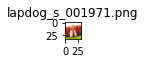

(32, 32, 3)


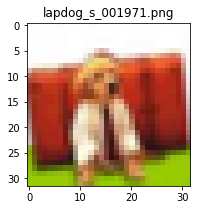

In [21]:
# Read 10000 images from batch 3
X, Y, names, classes = get_data("AIML_DS_CIFAR-10_STD/data_batch_3")
# Display the Nth image
pick = 90
print("Class =",classes[Y[pick]])
visualize_image(X, Y, names, pick,size=(0.3,0.3)) # output image would be a blured image
visualize_image(X, Y, names, pick,size=(3,3)) 

**The images you see above are pixelated and hence they are  blur.** (Pixelation happens when you display a low resolution of an image on a larger canvas (such a large screen), where each pixel ends up being displayed as an image. You could read more about it on https://whatis.techtarget.com/definition/pixelation ).  This however does not affect the prediction of your machine learning algorithm, for the same reason.

In [0]:
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    # tol is the stopping error limit 0.001
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model, training the network
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values


**Define a function to calculate accuracy score.**

In [0]:
from sklearn.metrics import accuracy_score
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

**Now we unpickle the data and labels from CIFAR-10 dataset and divide them into training and testing sets.**

In [0]:
train_features = []
train_labels = []
# Read all training features and labels
for j in "12345": 
    batch_file = 'AIML_DS_CIFAR-10_STD/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    train_features.extend(x_train)
    train_labels.extend(y_train)

train_features = np.asarray(train_features)
train_labels = np.asarray(train_labels)

# Read all test features and labels
test_features, test_labels, names_test, classes_test = get_data("AIML_DS_CIFAR-10_STD/test_batch")

In [10]:
# The input features are of 3072, each sample length 
# Each epoch has 50000 samples 
test_labels.shape, train_labels.shape, test_features.shape, train_features.shape

((10000,), (50000,), (10000, 3072), (50000, 3072))

In [0]:
# Function to extract the classes binary classification
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
# Select classes #5 and #7
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, train_features, train_labels)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,test_features, test_labels)

In [24]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.7365

### Credibility

Error on the testing data set is used as a measure of accuracy as they are values that the model has never seen and has not be adapted to.

### Underfitting
### Overfitting

Epochs versus Error graphs can give a good measure of the situation.

**Validation sets** are used to tune parameters.

Degrees vs MSE where train and validation error are plotted can give a good measure of the situation.

### K Cross Validation

Divide the dataset into K parts and K - 1 parts are train data and 1 part is validation. This split and train process is done K times, so that each set is a validation set once.

`sklearn` and other libraries have built in funtions for all kinds of data splits.

### Early Stopping

Done to prevent overfitting.

For example, if the result has improved in the last X epochs then continue, else stop.

In [56]:
class Perceptron(object):
    def __init__(self, input_size, lr=0.1, epochs=5, threshold=0.2):
        # Add one for bias
        # self.W = np.zeros(input_size+1)
        self.W = np.array([0, 0.3, -0.1])
        self.epochs = epochs
        self.lr = lr
        self.threshold = threshold
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= self.threshold else 0
 
    def predict(self, x):
        # Take dot product to get values 
        z = self.W.T.dot(x)
        # Use values to get output 
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                # At position 0 insert 1
                x = np.insert(X[i],0, 1)
                # print(i, x)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    d = np.array([0, 0, 0, 1])
 
    perceptron = Perceptron(input_size=2, threshold=0.2)
    perceptron.fit(X, d)
    print(perceptron.W)

[-0.1  0.3  0.1]
